<a href="https://colab.research.google.com/github/harikrish2727/cifar_10_CNN/blob/main/cifar_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 7s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
x_train[0].max()

255

In [8]:
x_train[0].min()

0

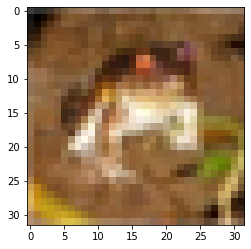

In [9]:
plt.imshow(x_train[0])

In [11]:
y_train[0]

array([6], dtype=uint8)

In [12]:
x_train = x_train/255
x_test = x_test/255

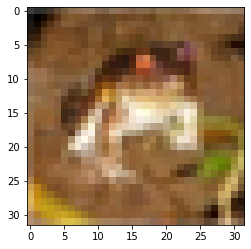

In [13]:
plt.imshow(x_train[0])

In [14]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [16]:
x_train[0].max()

1.0

In [17]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

**modeling**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [26]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),padding="same",activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),padding="same",activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=300,activation="relu"))

model.add(Dense(units=100,activation="relu"))

model.add(Dense(units=10,activation="softmax"))


In [27]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        1568      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        16416     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               614700    
_________________________________________________________________
dense_7 (Dense)              (None, 100)              

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
stopping = EarlyStopping(patience=5,monitor="val_loss")

In [32]:
model.fit(x_train,y_train_cat,batch_size=2000,epochs=15,callbacks=[stopping],validation_data=(x_train,y_train_cat))

Epoch 1/15
25/25 [==============================] - 98s 4s/step - loss: 1.6313 - accuracy: 0.4118 - val_loss: 1.5768 - val_accuracy: 0.4351
Epoch 2/15
25/25 [==============================] - 97s 4s/step - loss: 1.5019 - accuracy: 0.4627 - val_loss: 1.4499 - val_accuracy: 0.4829
Epoch 3/15
25/25 [==============================] - 97s 4s/step - loss: 1.4126 - accuracy: 0.4952 - val_loss: 1.4674 - val_accuracy: 0.4760
Epoch 4/15
25/25 [==============================] - 97s 4s/step - loss: 1.3635 - accuracy: 0.5188 - val_loss: 1.3276 - val_accuracy: 0.5329
Epoch 5/15
25/25 [==============================] - 97s 4s/step - loss: 1.2871 - accuracy: 0.5440 - val_loss: 1.2522 - val_accuracy: 0.5567
Epoch 6/15
25/25 [==============================] - 97s 4s/step - loss: 1.2431 - accuracy: 0.5604 - val_loss: 1.2036 - val_accuracy: 0.5800
Epoch 7/15
25/25 [==============================] - 97s 4s/step - loss: 1.2038 - accuracy: 0.5764 - val_loss: 1.2098 - val_accuracy: 0.5814
Epoch 8/15
25/25 [==

In [33]:
model.save("cifar10.h5")

In [34]:
losses = pd.DataFrame(model.history.history)

In [35]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.631312,0.41180,1.576847,0.43506
1,1.501916,0.46272,1.449871,0.48288
2,1.412628,0.49516,1.467404,0.47602
3,1.363531,0.51884,1.327556,0.53292
4,1.287150,0.54404,1.252182,0.55672


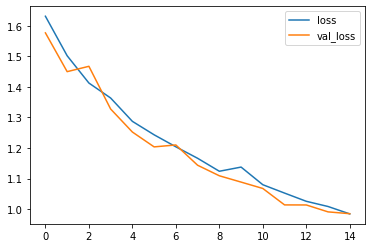

In [36]:
losses[["loss","val_loss"]].plot()

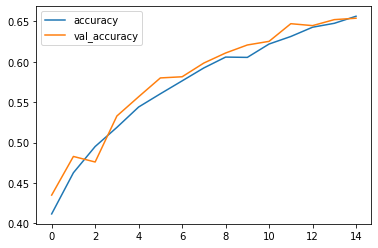

In [37]:
losses[["accuracy","val_accuracy"]].plot()

In [38]:
model.evaluate(x_test,y_test_cat)

313/313 [==============================] - 6s 18ms/step - loss: 1.0664 - accuracy: 0.6264


[1.0663650035858154, 0.6263999938964844]

In [39]:
prediction = model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
confusion_matrix(y_test,prediction)

array([[699,  15, 111,  32,  10,   9,  15,   4,  81,  24],
       [ 37, 748,  22,  24,   7,   5,  11,   7,  55,  84],
       [ 55,   9, 613,  90,  60,  71,  65,  21,  12,   4],
       [ 24,  10, 130, 515,  35, 176,  71,  15,  15,   9],
       [ 28,   4, 229, 109, 436,  46,  77,  55,  15,   1],
       [ 11,   3, 126, 237,  34, 527,  24,  25,   9,   4],
       [  5,   4,  87,  95,  23,  27, 741,   7,   7,   4],
       [ 16,   2,  75,  86,  60, 111,  13, 619,   6,  12],
       [ 95,  40,  35,  23,   4,  12,   4,   3, 768,  16],
       [ 54, 143,  30,  41,   6,  13,  19,  15,  81, 598]])

In [43]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1000
           1       0.76      0.75      0.76      1000
           2       0.42      0.61      0.50      1000
           3       0.41      0.52      0.46      1000
           4       0.65      0.44      0.52      1000
           5       0.53      0.53      0.53      1000
           6       0.71      0.74      0.73      1000
           7       0.80      0.62      0.70      1000
           8       0.73      0.77      0.75      1000
           9       0.79      0.60      0.68      1000

    accuracy                           0.63     10000
   macro avg       0.65      0.63      0.63     10000
weighted avg       0.65      0.63      0.63     10000

